In [2]:
%matplotlib notebook

import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [7]:
df = pd.DataFrame({'Name': pd.Series([], dtype='str'),
                   'ID' : pd.Series([], dtype='str'),
                   'Ratings': pd.Series([], dtype='int'),})
rating_re = r'.*?Rated by (\d*) p.*?'
title_re = r'Rate (.*?) by.*'
base_url = r'https://itch.io/jam/gmtk-2020/rate/'

In [8]:
ratings_page = requests.get("https://itch.io/jam/gmtk-2020/entries")
rating_soup = BeautifulSoup(ratings_page.content, 'html.parser')


In [ ]:
i = 0
for game in rating_soup.findAll("div", {"class": "game_cell"}):
    #if i > 3:
    #    break    
    i += 1
     
    game_id = game.attrs['data-game_id']
    
    if (df["ID"] == game_id).any():
        i -= 1
        continue
    
    #print(game_id)
    df.to_csv("ratings_data.csv", index = False)
    page = requests.get("https://itch.io/jam/gmtk-2020/rate/" + game_id)
    soup = BeautifulSoup(page.content, 'html.parser')
    rating_div = soup.find("div", {"class": "num_ratings"})
    title_element = soup.find("title")
    ratings = int(re.search(rating_re, str(rating_div)).group(1))
    title = re.search(title_re, str(title_element)).group(1)
    df = df.append({"Name":title, "ID":game_id, "Ratings":ratings}, ignore_index=True)
    time.sleep(0.01)

In [43]:
rating_re = r'.*?Rated by (\d*) p.*?'

<IPython.core.display.Javascript object>


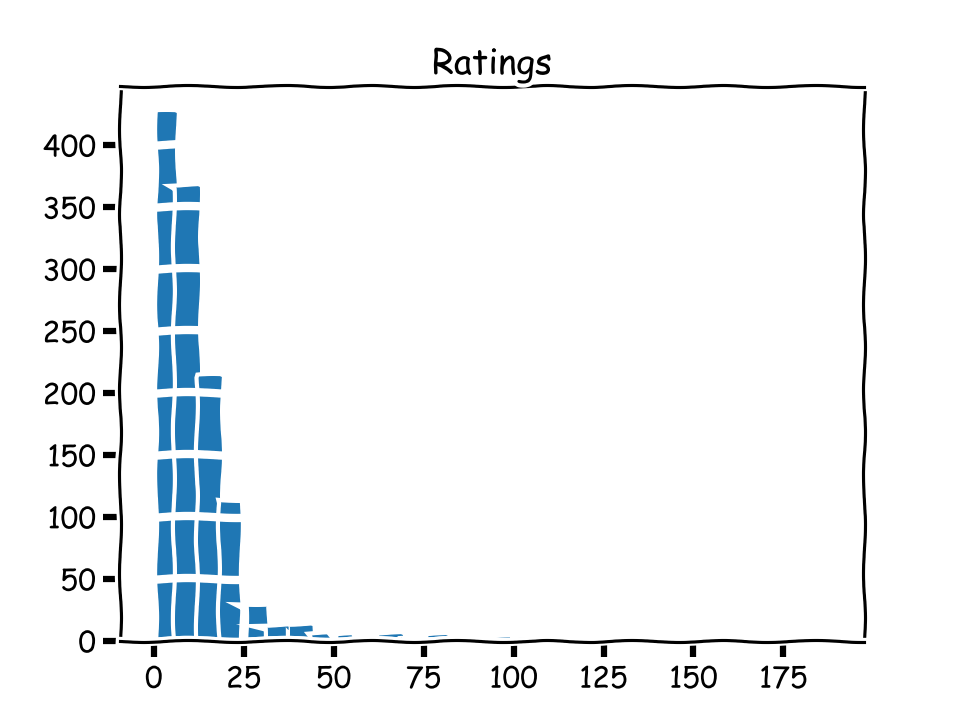

In [34]:
with plt.xkcd():
    hist = df.hist("Ratings", bins=30)

In [41]:
our_ratings = 39
np.sum(df['Ratings'] < our_ratings) / len(df)

0.9682274247491639

In [32]:
len(df)

1196

<IPython.core.display.Javascript object>


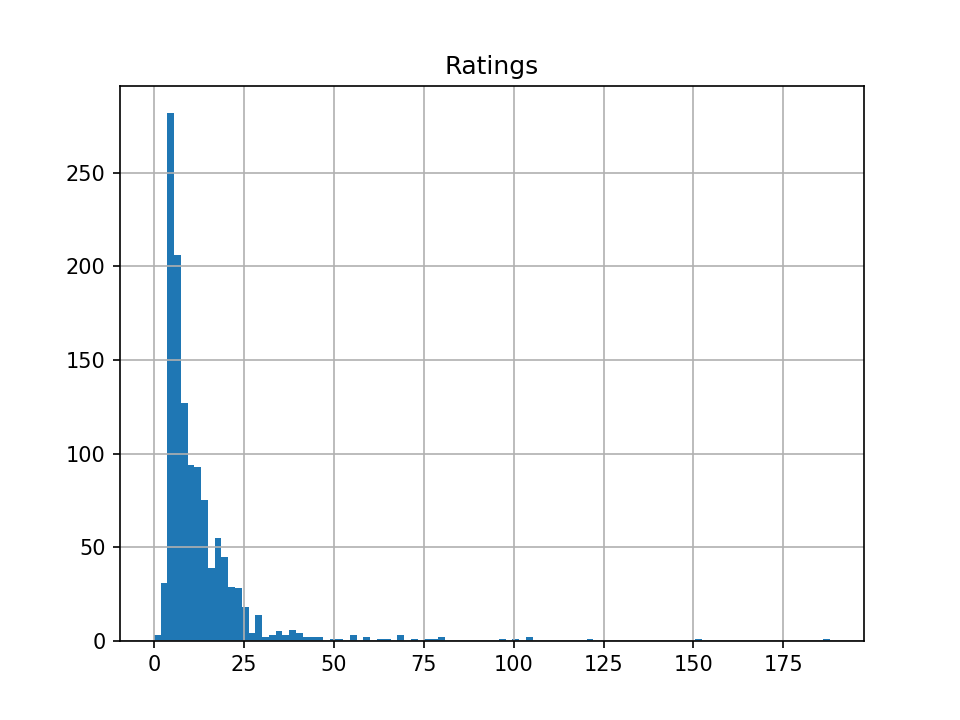

In [35]:
hist = df.hist("Ratings", bins=100)

In [40]:
np.max(df["Ratings"])

188

In [38]:
help(df.max)

Help on method max in module pandas.core.frame:

max(axis=None, skipna=None, level=None, numeric_only=None, **kwargs) method of pandas.core.frame.DataFrame instance
    This method returns the maximum of the values in the object.
                If you want the *index* of the maximum, use ``idxmax``. This is
                the equivalent of the ``numpy.ndarray`` method ``argmax``.
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
    skipna : boolean, default True
        Exclude NA/null values when computing the result.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series
    numeric_only : boolean, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    
    Returns
    -------
    max : Series or DataFrame (if level specified)



In [39]:
df.max("Ratings")

ValueError: No axis named Ratings for object type <class 'pandas.core.frame.DataFrame'>